In [1]:
#create the qubic synthesized beam

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math as mt

In [3]:
def get_primbeam(th, lam, fwhmprimbeam_150=14.):
    fwhmprim = 14. * lam / (3e8/150e9)
    primbeam = np.exp(-0.5 * th**2 / (fwhmprim/2.35)**2)
    return primbeam

In [4]:
def give_sbcut(th, dx, lam, sqnh, Df=1., detpos=0., fwhmprimbeam_150=14.):
    primbeam =  get_primbeam(th, lam, fwhmprimbeam_150=fwhmprimbeam_150)
    theth = th - np.degrees(detpos/Df)
    sb = np.sin(sqnh * np.pi * dx / lam * np.radians(theth))**2 / np.sin(np.pi * dx / lam * np.radians(theth))**2
    return sb/np.max(sb)*primbeam

In [5]:
#### Synthesized beam cut plot
fwhmprim_150 = 14. #deg
nu = 150e9
lam = 3e8/nu    #m
dx = 14./1000  #m
sqnh = 20
Df = 1. #m
minth = -20.
maxth = 20
nth = 1000
th = np.linspace(minth, maxth, nth)

In [6]:
sb = np.sin(sqnh * np.pi * dx / lam * np.radians(th))**2 / np.sin(np.pi * dx / lam * np.radians(th))**2
sb = sb/max(sb)

fwhmpeak = np.degrees(lam / sqnh / dx)
thetapeak = np.degrees(lam / dx)

In [7]:
sbth = give_sbcut(th, dx, lam, sqnh, Df=Df, detpos=0.)

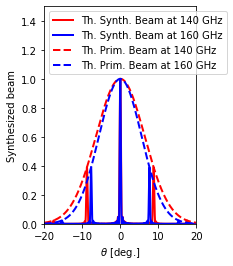

In [8]:
plt.figure()

plt.subplot(1,2,1)
dist = [0.]
for d in dist:
    nu0=140.
    nu1=160.
    lam0 = 3e8/(nu0*1e9)
    lam1 = 3e8/(nu1*1e9)
    b1 = give_sbcut(th, dx, lam0, sqnh, Df=Df, detpos=d/1000)
    b2 = give_sbcut(th, dx, lam1, sqnh, Df=Df, detpos=d/1000)
    plt.plot(th, b1, 'r', lw=2, label='Th. Synth. Beam at {0:3.0f} GHz'.format(nu0))
    plt.plot(th, b2, 'b', lw=2, label='Th. Synth. Beam at {0:3.0f} GHz'.format(nu1))
    plt.plot(th, get_primbeam(th, lam0), 'r--', lw=2, label='Th. Prim. Beam at {0:3.0f} GHz'.format(nu0))
    plt.plot(th, get_primbeam(th, lam1), 'b--', lw=2, label='Th. Prim. Beam at {0:3.0f} GHz'.format(nu1))
    plt.xlabel(r'$\theta$ [deg.]')
    plt.ylabel('Synthesized beam')
    plt.draw()
    plt.ylim(0,1.5)
    plt.xlim(-20,20)
    plt.legend(loc='upper left')
    bb1 = b1/np.sqrt(np.sum(b1**2))
    bb2 = b2/np.sqrt(np.sum(b2**2))
    #print(np.sum(bb1*bb2))
    

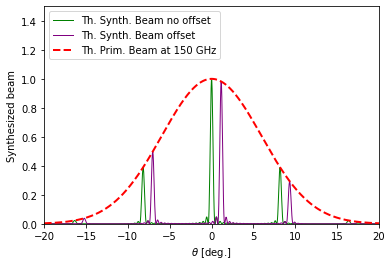

In [9]:
# now lets do beam for detector offset from centre
nu=150.
lam=3e8/(nu*1e9)
d1=0
d2=20
b1 = give_sbcut(th, dx, lam, sqnh, Df=Df, detpos=d1/1000)
b2 = give_sbcut(th, dx, lam, sqnh, Df=Df, detpos=d2/1000)
plt.plot(th, b1, 'g', lw=1, label='Th. Synth. Beam no offset'.format(nu0))
plt.plot(th, b2, 'purple', lw=1, label='Th. Synth. Beam offset'.format(nu1))
plt.plot(th, get_primbeam(th, lam), 'r--', lw=2, label='Th. Prim. Beam at 150 GHz'.format(nu0))
plt.xlabel(r'$\theta$ [deg.]')
plt.ylabel('Synthesized beam')
plt.draw()
plt.ylim(0,1.5)
plt.xlim(-20,20)
plt.legend(loc='upper left')

In [10]:
def get_primbeam_2d(thy, thx, lam, fwhmprimbeam_150=14.):
    fwhmprim = 14. * lam / (3e8/150e9)
    dist=np.sqrt(thx**2+thy**2)
    primbeam = np.exp(-0.5 * dist**2 / (fwhmprim/2.35)**2)
    return primbeam

In [11]:
def sb_2d(thx, thy, dx, lam, sqnh, Df=1., detposx=0., detposy=0., fwhmprimbeam_150=14.):
    primbeam =  get_primbeam_2d(thx, thy, lam)
    thetx = thx - np.degrees(detposx/Df)
    thety = thy - np.degrees(detposy/Df)
    sb = (np.sin(sqnh * np.pi * dx / lam * np.radians(thx))**2 / np.sin(np.pi * dx / lam * np.radians(thx))**2) *(np.sin(sqnh * np.pi * dx / lam * np.radians(thy))**2 / np.sin(np.pi * dx / lam * np.radians(thy))**2)
    return sb/np.max(sb)*primbeam

In [12]:
tx = np.linspace(minth, maxth, nth)
ty=np.linspace(minth,maxth,nth)
_thx,_thy=np.meshgrid(tx,ty)
angle = 44.9

In [13]:
thx = _thx * np.cos(angle * np.pi / 180) - _thy * np.sin(angle * np.pi / 180)
thy = _thx * np.sin(angle * np.pi / 180) + _thy * np.cos(angle * np.pi / 180)

In [14]:
detposx=0.
detposy=0.

In [15]:
sbeam=sb_2d(thx, thy, dx, lam, sqnh, Df, detposx, detposy)

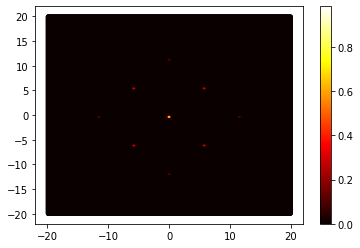

In [16]:
plt.scatter(_thx,_thy, c=sbeam, s=5, cmap=cm.hot)
cbar= plt.colorbar()
plt.show()


In [17]:
#now just peaks method
import numexpr as ne
c=3e8
kmax=2
horn_spacing=dx
angle=44.9

In [18]:
position=np.array([[0,0]])

In [19]:
lmbda = c / 150e9
#position = -position / np.sqrt(np.sum(position ** 2, axis=-1))[..., None]
if angle != 0:
    _kx, _ky = np.mgrid[-kmax:kmax + 1, -kmax:kmax + 1]
    kx = _kx * np.cos(angle * np.pi / 180) - _ky * np.sin(angle * np.pi / 180)
    ky = _kx * np.sin(angle * np.pi / 180) + _ky * np.cos(angle * np.pi / 180)
else:
    kx, ky = np.mgrid[-kmax:kmax + 1, -kmax:kmax + 1]

nx = position[:, 0, None] - lmbda * kx.ravel() / horn_spacing
ny = position[:, 1, None] - lmbda * ky.ravel() / horn_spacing
local_dict = {'nx': nx, 'ny': ny}
theta = ne.evaluate('arcsin(sqrt(nx**2 + ny**2))',local_dict=local_dict)
phi = ne.evaluate('arctan2(ny, nx)', local_dict=local_dict)

xdeg=np.degrees(nx)
ydeg=np.degrees(ny)


In [20]:
val = get_primbeam_2d(xdeg, ydeg, lam)

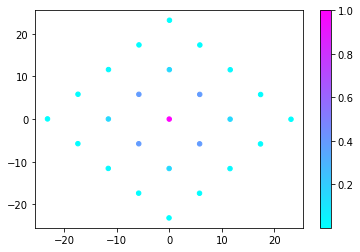

In [21]:
plt.scatter(xdeg,ydeg, c=val, s=20, cmap=cm.cool)
cbar= plt.colorbar()
plt.show()

In [22]:
#print theta phi and val
print(theta)
print(phi)
print(val)

[[0.41595209 0.32513665 0.2897517  0.32513665 0.41595209 0.32513665
  0.20343074 0.14334757 0.20343074 0.32513665 0.2897517  0.14334757
  0.         0.14334757 0.2897517  0.32513665 0.20343074 0.14334757
  0.20343074 0.32513665 0.41595209 0.32513665 0.2897517  0.32513665
  0.41595209]]
[[ 1.56905100e+00  1.24730044e+00  7.83652834e-01  3.20005225e-01
  -1.74532925e-03  1.89080155e+00  1.56905100e+00  7.83652834e-01
  -1.74532925e-03 -3.23495884e-01  2.35444916e+00  2.35444916e+00
   0.00000000e+00 -7.87143493e-01 -7.87143493e-01  2.81809677e+00
   3.13984732e+00 -2.35793982e+00 -1.57254166e+00 -1.25079110e+00
   3.13984732e+00 -2.82158743e+00 -2.35793982e+00 -1.89429221e+00
  -1.57254166e+00]]
[[5.25727228e-04 8.92226861e-03 2.29287424e-02 8.92226861e-03
  5.25727228e-04 8.92226861e-03 1.51422397e-01 3.89130309e-01
  1.51422397e-01 8.92226861e-03 2.29287424e-02 3.89130309e-01
  1.00000000e+00 3.89130309e-01 2.29287424e-02 8.92226861e-03
  1.51422397e-01 3.89130309e-01 1.51422397e-01 8.